In [42]:
import pandas as pd
from moexalgo import Market, Ticker

In [70]:
df = pd.read_csv('data/ListingSecurityList.csv', engine='python', encoding='cp1251', sep=';')

In [71]:
df.columns

Index(['DATESTAMP', 'INSTRUMENT_ID', 'LIST_SECTION', 'RN', 'SUPERTYPE',
       'INSTRUMENT_TYPE', 'INSTRUMENT_CATEGORY', 'TRADE_CODE', 'ISIN',
       'REGISTRY_NUMBER', 'REGISTRY_DATE', 'EMITENT_FULL_NAME', 'INN',
       'NOMINAL', 'CURRENCY', 'ISSUE_AMOUNT', 'DECISION_DATE', 'OKSM_EDR',
       'ONLY_EMITENT_FULL_NAME', 'REG_COUNTRY', 'QUALIFIED_INVESTOR',
       'HAS_PROSPECTUS', 'IS_CONCESSION_AGREEMENT', 'IS_MORTGAGE_AGENT',
       'INCLUDED_DURING_CREATION', 'SECURITY_HAS_DEFAULT',
       'SECURITY_HAS_TECH_DEFAULT', 'INCLUDED_WITHOUT_COMPLIANCE',
       'RETAINED_WITHOUT_COMPLIANCE', 'HAS_RESTRICTION_CIRCULATION',
       'LISTING_LEVEL_HIST', 'OBLIGATION_PROGRAM_RN', 'COUPON_PERCENT',
       'EARLY_REPAYMENT', 'EARLY_REDEMPTION', 'ISS_BOARDS', 'OTHER_SECURITIES',
       'DISCLOSURE_PART_PAGE', 'DISCLOSURE_RF_INFO_PAGE', 'INCLUDE_DATE',
       'CFI_FOREIGN', 'ISIN_UNDERLYING_ASSET', 'CFI_UNDERLYING_ASSET',
       'PIF_STATUS', 'PIF_STATUS_HIST', 'OBLIGATION_PROGRAM_DATE',
       'I

In [40]:
df = df[['TRADE_CODE','EMITENT_FULL_NAME','INSTRUMENT_TYPE', 'LIST_SECTION', 'INSTRUMENT_CATEGORY','CURRENCY','NOMINAL','ISSUE_AMOUNT']]

In [58]:
df['TRADE_CODE'][11]

'CBOM'

In [59]:
df = df.reset_index(drop=True)

In [74]:
df.head()

,DATESTAMP,INSTRUMENT_ID,LIST_SECTION,RN,SUPERTYPE,INSTRUMENT_TYPE,INSTRUMENT_CATEGORY,TRADE_CODE,ISIN,REGISTRY_NUMBER,REGISTRY_DATE,EMITENT_FULL_NAME,INN,NOMINAL,CURRENCY,ISSUE_AMOUNT,DECISION_DATE,OKSM_EDR,ONLY_EMITENT_FULL_NAME,REG_COUNTRY,QUALIFIED_INVESTOR,HAS_PROSPECTUS,IS_CONCESSION_AGREEMENT,IS_MORTGAGE_AGENT,INCLUDED_DURING_CREATION,SECURITY_HAS_DEFAULT,SECURITY_HAS_TECH_DEFAULT,INCLUDED_WITHOUT_COMPLIANCE,RETAINED_WITHOUT_COMPLIANCE,HAS_RESTRICTION_CIRCULATION,LISTING_LEVEL_HIST,OBLIGATION_PROGRAM_RN,COUPON_PERCENT,EARLY_REPAYMENT,EARLY_REDEMPTION,ISS_BOARDS,OTHER_SECURITIES,DISCLOSURE_PART_PAGE,DISCLOSURE_RF_INFO_PAGE,INCLUDE_DATE,CFI_FOREIGN,ISIN_UNDERLYING_ASSET,CFI_UNDERLYING_ASSET,PIF_STATUS,PIF_STATUS_HIST,OBLIGATION_PROGRAM_DATE,ISS_BOARDS_HASH,OTHER_SECURITIES_HASH,CACHING_TIMESTAMP,Unnamed: 49
11,01.12.2023 0:00:00,5771,Первый уровень,12,Акции,Акция обыкновенная,акции обыкновенные,CBOM,RU000A0JUG31,10101978B,18.08.1999 0:00:00,"""МОСКОВСКИЙ КРЕДИТНЫЙ БАНК"" (публичное акционе...",7.734203e+09,1,Рубль,33429709866,11.03.2014 0:00:00,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.06.2015 Включение в Первый уровень 09.06.20...,NaN,NaN,NaN,NaN,РПС: Акции - адрес. РЕПО в ин. валюте: USD РЕП...,"Облигация биржевая, 4B020801978B, RU000A0JV3K6...",http:// www.mkb.ru,http://www.e-disclosure.ru/portal/company.aspx...,22.06.2015 0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,A60652A98E90C448583A793EB5E9E28DF2995C9A,6E2F5512613604886B4A11CCB20DEDF8C053E1C6,02.12.2023 10:26:12,NaN
26,01.12.2023 0:00:00,5201,Первый уровень,27,Акции,Акции иностранного эмитента,Акции обыкновенные бездокументарные именные,POLY,JE00B6T5S470,NaN,NaN,Polymetal International plc,NaN,"0,03",Доллар США,515259819,14.06.2013 0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09.06.2014 Включение в Первый уровень 06.08.20...,NaN,NaN,NaN,NaN,РПС: Акции - адрес. РЕПО в ин. валюте: USD РЕП...,NaN,https://www.polymetalinternational.com/ru/inve...,https://e-disclosure.ru/portal/company.aspx?id...,09.06.2014 0:00:00,ESVUFR,NaN,NaN,NaN,NaN,NaN,394491565781EB41BF42CEA3121F14281F3037E3,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,02.12.2023 10:26:12,NaN
27,01.12.2023 0:00:00,5923,Первый уровень,28,Акции,Акции иностранного эмитента,Обыкновенные именные бездокументарные акции кл...,YNDX,NL0009805522,NaN,NaN,Public Limited Liability Company Yandex N.V.,NaN,"0,01",Евро,326342270,03.06.2014 0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09.06.2014 Включение в Первый уровень 03.06.20...,NaN,NaN,NaN,NaN,РПС: Акции - адрес. РЕПО в ин. валюте: USD РЕП...,NaN,https://ir.yandex/financial-releases,https://e-disclosure.ru/portal/company.aspx?id...,09.06.2014 0:00:00,ESVUFN,NaN,NaN,NaN,NaN,NaN,394491565781EB41BF42CEA3121F14281F3037E3,DA39A3EE5E6B4B0D3255BFEF95601890AFD80709,02.12.2023 10:26:12,NaN
41,01.12.2023 0:00:00,3762,Первый уровень,42,Акции,Акция обыкновенная,акции обыкновенные,ALRS,RU0007252813,1-03-40046-N,25.08.2011 0:00:00,"Акционерная компания ""АЛРОСА"" (публичное акцио...",1.433000e+09,"0,5",Рубль,7364965630,23.11.2011 0:00:00,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09.06.2014 Включение в Первый уровень 02.10.20...,NaN,NaN,NaN,NaN,РПС: Акции - адрес. РЕПО в ин. валюте: USD РЕП...,"Облигация биржевая, 4B02-03-40046-N, RU000A101...",http://www.alrosa.ru/инвесторам-и-акционерам/,https://e-disclosure.ru/portal/company.aspx?id...,09.06.2014 0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,A60652A98E90C448583A793EB5E9E28DF2995C9A,3FED59C01CBE883FF3719BE731A6A0F0A03D72BE,02.12.2023 10:26:12,NaN
101,01.12.2023 0:00:00,99,Первый уровень,102,Акции,Акция обыкновенная,акции обыкновенные,VTBR,RU000A0JP5V6,10401000B,29.09.2006 0:00:00,Банк ВТБ (публичное акционерное общество),7.702070e+09,"0,01",Рубль,26849669465190,28.04.2007 0:00:00,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09.06.2014 Включение в Первый уровень 28.02.20...,NaN,NaN,NaN,NaN,РПС: Акции - адрес. РЕПО в ин. валюте: USD РЕП...,"Облигация биржевая, 4B023001000B, RU000A0JV3Q3...",http://www.vtb.ru,http:

In [47]:
pd.set_option('display.max_columns', 100)

In [73]:
df = df[(df['INSTRUMENT_TYPE'] == 'Акция обыкновенная') | (df['INSTRUMENT_TYPE'] == 'Акции иностранного эмитента')]

In [64]:
# Акции SBER
sber = Ticker('POLY')

# Все акции
stocks = Market('stocks')

In [75]:
# Свечи по акциям SBER за период
sber.candles(date='2023-10-10', till_date='2023-10-18', period='10m').head()

,open,close,high,low,value,volume,begin,end
0,525.3,525.3,525.3,525.3,2129566.2,4054.0,2023-10-10 09:50:00,2023-10-10 09:59:59
1,525.2,520.9,525.2,519.5,35211261.8,67509.0,2023-10-10 10:00:00,2023-10-10 10:09:59
2,521.2,519.3,522.7,517.3,27345103.6,52578.0,2023-10-10 10:10:00,2023-10-10 10:19:59
3,518.8,519.0,519.5,516.3,23626505.3,45626.0,2023-10-10 10:20:00,2023-10-10 10:29:59
4,519.1,519.3,519.4,518.3,6536669.2,12599.0,2023-10-10 10:30:00,2023-10-10 10:39:59


In [67]:
DATE_START = '2023-01-01'
DATE_END = '2023-01-02'

In [78]:
sber.tradestats(date='2023-01-01', till_date='2023-01-02').head()

""


In [76]:
# Данные по акциям SBER за период
sber.tradestats(date=DATE_START, till_date=DATE_END).head()

""


In [52]:
df_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     5 non-null      object        
 1   tradedate  5 non-null      object        
 2   tradetime  5 non-null      object        
 3   pr_open    5 non-null      float64       
 4   pr_high    5 non-null      float64       
 5   pr_low     5 non-null      float64       
 6   pr_close   5 non-null      float64       
 7   pr_std     5 non-null      float64       
 8   vol        5 non-null      int64         
 9   val        5 non-null      float64       
 10  trades     5 non-null      int64         
 11  pr_vwap    5 non-null      float64       
 12  pr_change  5 non-null      float64       
 13  trades_b   5 non-null      int64         
 14  trades_s   5 non-null      int64         
 15  val_b      5 non-null      float64       
 16  val_s      5 non-null      float64       
 17  v

In [98]:
# Данные по всем акциям за дату. Чтобы получить данные за период, нужно запустить цикл по датам
stocks.tradestats(date='2023-10-10')['ticker'].unique().tolist()

['ABIO',
 'ABRD',
 'AFKS',
 'AFLT',
 'AGRO',
 'AKRN',
 'ALRS',
 'AMEZ',
 'APTK',
 'AQUA',
 'ASSB',
 'AVAN',
 'BANE',
 'BANEP',
 'BELU',
 'BISVP',
 'BLNG',
 'BSPB',
 'BSPBP',
 'CARM',
 'CBOM',
 'CHGZ',
 'CHMF',
 'CHMK',
 'CIAN',
 'CNTL',
 'CNTLP',
 'DIOD',
 'DSKY',
 'DVEC',
 'DZRD',
 'DZRDP',
 'EELT',
 'ELFV',
 'ELTZ',
 'ENPG',
 'ETLN',
 'FEES',
 'FESH',
 'FIVE',
 'FIXP',
 'FLOT',
 'GAZA',
 'GAZAP',
 'GAZP',
 'GCHE',
 'GECO',
 'GEMA',
 'GEMC',
 'GLTR',
 'GMKN',
 'GTRK',
 'HHRU',
 'HIMCP',
 'HMSG',
 'HYDR',
 'IGST',
 'IGSTP',
 'INGR',
 'IRAO',
 'IRKT',
 'JNOS',
 'JNOSP',
 'KAZT',
 'KAZTP',
 'KBSB',
 'KLSB',
 'KMAZ',
 'KMEZ',
 'KMTZ',
 'KRKN',
 'KRKOP',
 'KROT',
 'KROTP',
 'KRSBP',
 'KUBE',
 'KUZB',
 'KZOS',
 'KZOSP',
 'LENT',
 'LIFE',
 'LKOH',
 'LNZL',
 'LNZLP',
 'LSNG',
 'LSNGP',
 'LSRG',
 'LVHK',
 'MAGE',
 'MAGEP',
 'MAGN',
 'MDMG',
 'MFGS',
 'MFGSP',
 'MGNT',
 'MGTS',
 'MGTSP',
 'MISBP',
 'MOEX',
 'MRKC',
 'MRKK',
 'MRKP',
 'MRKS',
 'MRKU',
 'MRKV',
 'MRKY',
 'MRKZ',
 'MSNG',
 'MSRS',

In [121]:
df = pd.read_csv('tradestats_CBOM.csv', engine='python', encoding='cp1251', sep=',')

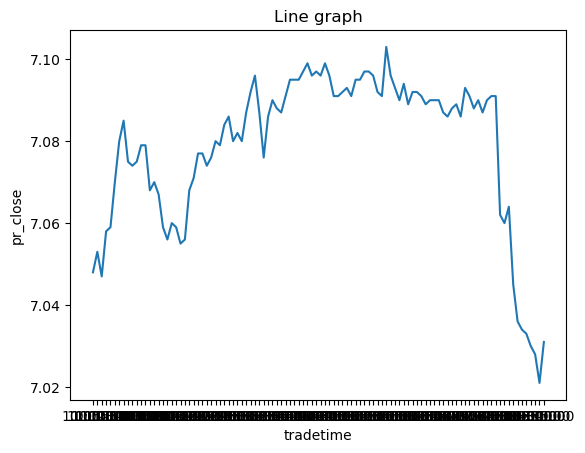

In [113]:
from matplotlib import pyplot as plt   
   
x = df[df['tradedate']=='2023-10-02']['tradetime']   
y = df[df['tradedate']=='2023-10-02']['pr_close']   
   
plt.plot(x,y)   
   
plt.title("Line graph")   
plt.ylabel('pr_close')   
plt.xlabel('tradetime')   
plt.show()   

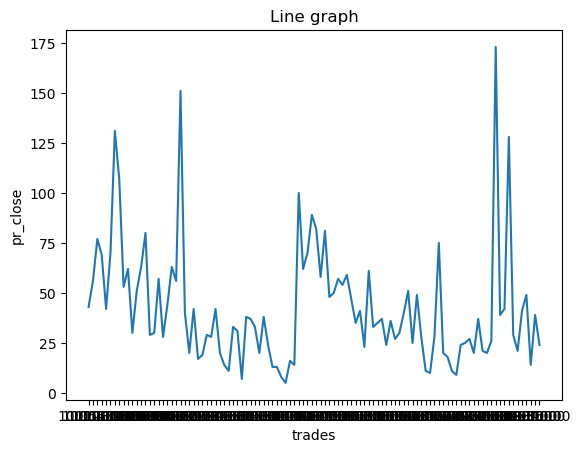

In [114]:
x = df[df['tradedate']=='2023-10-02']['tradetime']   
y = df[df['tradedate']=='2023-10-02']['trades']   
   
plt.plot(x,y)   
   
plt.title("Line graph")   
plt.ylabel('pr_close')   
plt.xlabel('trades')   
plt.show()   

In [115]:
df.columns

Index(['tradedate', 'tradetime', 'secid', 'pr_open', 'pr_high', 'pr_low',
       'pr_close', 'pr_std', 'vol', 'val', 'trades', 'pr_vwap', 'pr_change',
       'trades_b', 'trades_s', 'val_b', 'val_s', 'vol_b', 'vol_s', 'disb',
       'pr_vwap_b', 'pr_vwap_s', 'SYSTIME'],
      dtype='object')

In [116]:
df.sort_values(by='tradetime', ascending=True)

,tradedate,tradetime,secid,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,trades,pr_vwap,pr_change,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,SYSTIME
0,2023-10-02,10:05:00,CBOM,7.050,7.050,7.043,7.048,0.0002,3556,2506629,43,7.049,-0.0284,26,17,1294299,1212330,1836,1720,0.03,7.050,7.048,2023-10-26 16:02:26
312,2023-10-05,10:05:00,CBOM,6.964,6.971,6.954,6.954,0.0006,1110,772113,45,6.956,-0.1436,13,32,58546,713566,84,1026,-0.85,6.970,6.955,2023-10-26 15:53:38
518,2023-10-09,10:05:00,CBOM,7.000,7.000,6.948,6.987,0.0013,5670,3956370,130,6.978,-0.1857,44,86,1557634,2398735,2229,3441,-0.21,6.988,6.971,2023-10-26 15:47:58
104,2023-10-03,10:05:00,CBOM,7.022,7.022,6.954,6.990,0.0015,8104,5674245,165,7.002,-0.4557,82,83,706830,4967415,1012,7092,-0.75,6.984,7.004,2023-10-26 15:58:50
622,2023-10-10,10:05:00,CBOM,7.006,7.006,6.998,7.000,0.0002,1981,1387411,117,7.004,-0.0856,96,21,1005202,382208,1435,546,0.45,7.005,7.000,2023-10-26 15:44:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2023-10-06,18:40:00,CBOM,6.933,6.943,6.933,6.939,0.0006,812,562971,9,6.933,0.0865,4,5,5553,557418,8,804,-0.98,6.941,6.933,2023-10-26 15:51:48
207,2023-10-03,18:40:00,CBOM,7.026,7.026,7.025,7.025,0.0001,29,20372,3,7.025,-0.0142,0,3,0,20372,0,29,-1.00,NaN,7.025,2023-10-26 15:59:52
414,2023-10-05,18:40:00,CBOM,6.931,6.931,6.931,6.931,0.0000,7,4851,7,6.931,0.0000,0,7,0,4851,0,7,-1.00,NaN,6.931,2023-10-26 15:54:38
621,2023-10-09,18:40:00,CBOM,7.004,7.005,7.003,7.003,0.0001,745,521759,9,7.003,-0.0143,2,7,1401,520358,2,743,-0.99,7.005,7.003,2023-10-26 15:48:58


In [91]:
df['tradedate']

['2023-10-02',
 '2023-10-03',
 '2023-10-04',
 '2023-10-05',
 '2023-10-06',
 '2023-10-09',
 '2023-10-10']

In [100]:
df.head()

,tradedate,tradetime,secid,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,trades,pr_vwap,pr_change,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,SYSTIME
0,2023-10-02,10:05:00,CBOM,7.050,7.050,7.043,7.048,0.0002,3556,2506629,43,7.049,-0.0284,26,17,1294299,1212330,1836,1720,0.03,7.050,7.048,2023-10-26 16:02:26
1,2023-10-02,10:10:00,CBOM,7.049,7.054,7.045,7.053,0.0002,3284,2314612,56,7.048,0.0567,39,17,881339,1433272,1250,2034,-0.24,7.051,7.047,2023-10-26 16:02:26
2,2023-10-02,10:15:00,CBOM,7.053,7.054,7.031,7.047,0.0003,6544,4610734,77,7.046,-0.0851,49,28,1855260,2755473,2633,3911,-0.20,7.046,7.045,2023-10-26 16:02:27
3,2023-10-02,10:20:00,CBOM,7.047,7.067,7.047,7.058,0.0002,2754,1941936,69,7.051,0.1561,46,23,1719004,222932,2438,316,0.77,7.051,7.055,2023-10-26 16:02:27
4,2023-10-02,10:25:00,CBOM,7.058,7.060,7.054,7.059,0.0003,1766,1246480,42,7.058,0.0142,22,20,1028474,218005,1457,309,0.65,7.059,7.055,2023-10-26 16:02:28


In [102]:
df.columns

Index(['tradedate', 'tradetime', 'secid', 'pr_open', 'pr_high', 'pr_low',
       'pr_close', 'pr_std', 'vol', 'val', 'trades', 'pr_vwap', 'pr_change',
       'trades_b', 'trades_s', 'val_b', 'val_s', 'vol_b', 'vol_s', 'disb',
       'pr_vwap_b', 'pr_vwap_s', 'SYSTIME'],
      dtype='object')

In [126]:
df = pd.read_csv('tradestats_CBOM.csv', engine='python', encoding='cp1251', sep=',')

In [127]:
df.loc[:,'trade_datetime'] = pd.to_datetime(df.tradedate.astype(str)+' '+df.tradetime.astype(str))

df = df[['trade_datetime', 'pr_open', 'pr_high', 'pr_low', 'vol', 'val', 'trades','trades_b', 'trades_s', 'val_b', 'val_s', 'vol_b', 'vol_s','pr_close']]

df.columns = ['trade_datetime', 'pr_open', 'pr_high', 'pr_low', 'vol', 'val', 'trades','trades_b', 'trades_s', 'val_b', 'val_s', 'vol_b', 'vol_s','target']

df["segment"] = "main"

df_etna = df


In [128]:
df_etna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   trade_datetime  726 non-null    datetime64[ns]
 1   pr_open         726 non-null    float64       
 2   pr_high         726 non-null    float64       
 3   pr_low          726 non-null    float64       
 4   vol             726 non-null    int64         
 5   val             726 non-null    int64         
 6   trades          726 non-null    int64         
 7   trades_b        726 non-null    int64         
 8   trades_s        726 non-null    int64         
 9   val_b           726 non-null    int64         
 10  val_s           726 non-null    int64         
 11  vol_b           726 non-null    int64         
 12  vol_s           726 non-null    int64         
 13  target          726 non-null    float64       
 14  segment         726 non-null    object        
dtypes: dat

In [33]:
!virtualenv -p /usr/bin/python3.10 jupyter_environment

python: can't open file '/Users/valentin/PycharmProjects/Go.Algo/virtualenv': [Errno 2] No such file or directory


In [ ]:
!source jupyter_environment/bin/activate

In [ ]:
!jupyter notebook --allow-root

In [34]:
!python -V 

Python 3.10.13


In [25]:
!pip install --upgrade pip
!pip install etna

In [28]:
!pip install 'etna[all]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.6 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 3.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 4.0 MB/s eta 0:00:0000:0100:01
  Using cached torch-1.13.1-cp310-none-macosx_11_0_arm64.whl (53.2 MB)
  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl.metadata (

In [30]:
!python -m pip list

Package                Version
---------------------- ------------
aiohttp                3.9.1
aiosignal              1.3.1
alembic                1.13.0
antlr4-python3-runtime 4.9.3
anyio                  3.5.0
appnope                0.1.2
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
asttokens              2.0.5
async-timeout          4.0.3
attrs                  23.1.0
autopage               0.5.2
backcall               0.2.0
bleach                 4.1.0
boto3                  1.33.6
botocore               1.33.6
Bottleneck             1.3.7
catboost               1.2.2
certifi                2023.11.17
cffi                   1.16.0
charset-normalizer     2.0.4
click                  8.1.7
cliff                  4.4.0
cloudpickle            3.0.0
cmaes                  0.10.0
cmd2                   2.4.3
cmdstanpy              1.2.0
colorlog               6.8.0
comm                   0.2.0
contourpy              1.2.0
cycler                 0.11.0
Cython              

In [31]:
from etna.datasets.tsdataset import TSDataset

python: can't open file '/Users/valentin/PycharmProjects/Go.Algo/from': [Errno 2] No such file or directory


In [129]:
df = TSDataset.to_dataset(df_etna)
df.head()

ModuleNotFoundError: No module named 'etna'